## Liya Tilahun
## DS 1.1 Final Project
# Summer Olympics

In [2]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

## Data exploration

In [3]:
FILEPATH = '../Summer-Olympic-medals-1976-to-2008.csv'
df = pd.read_csv(FILEPATH, encoding= 'unicode_escape')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
df.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


## Question 1: Which country had the highest number of medals from 1976 - 2008?

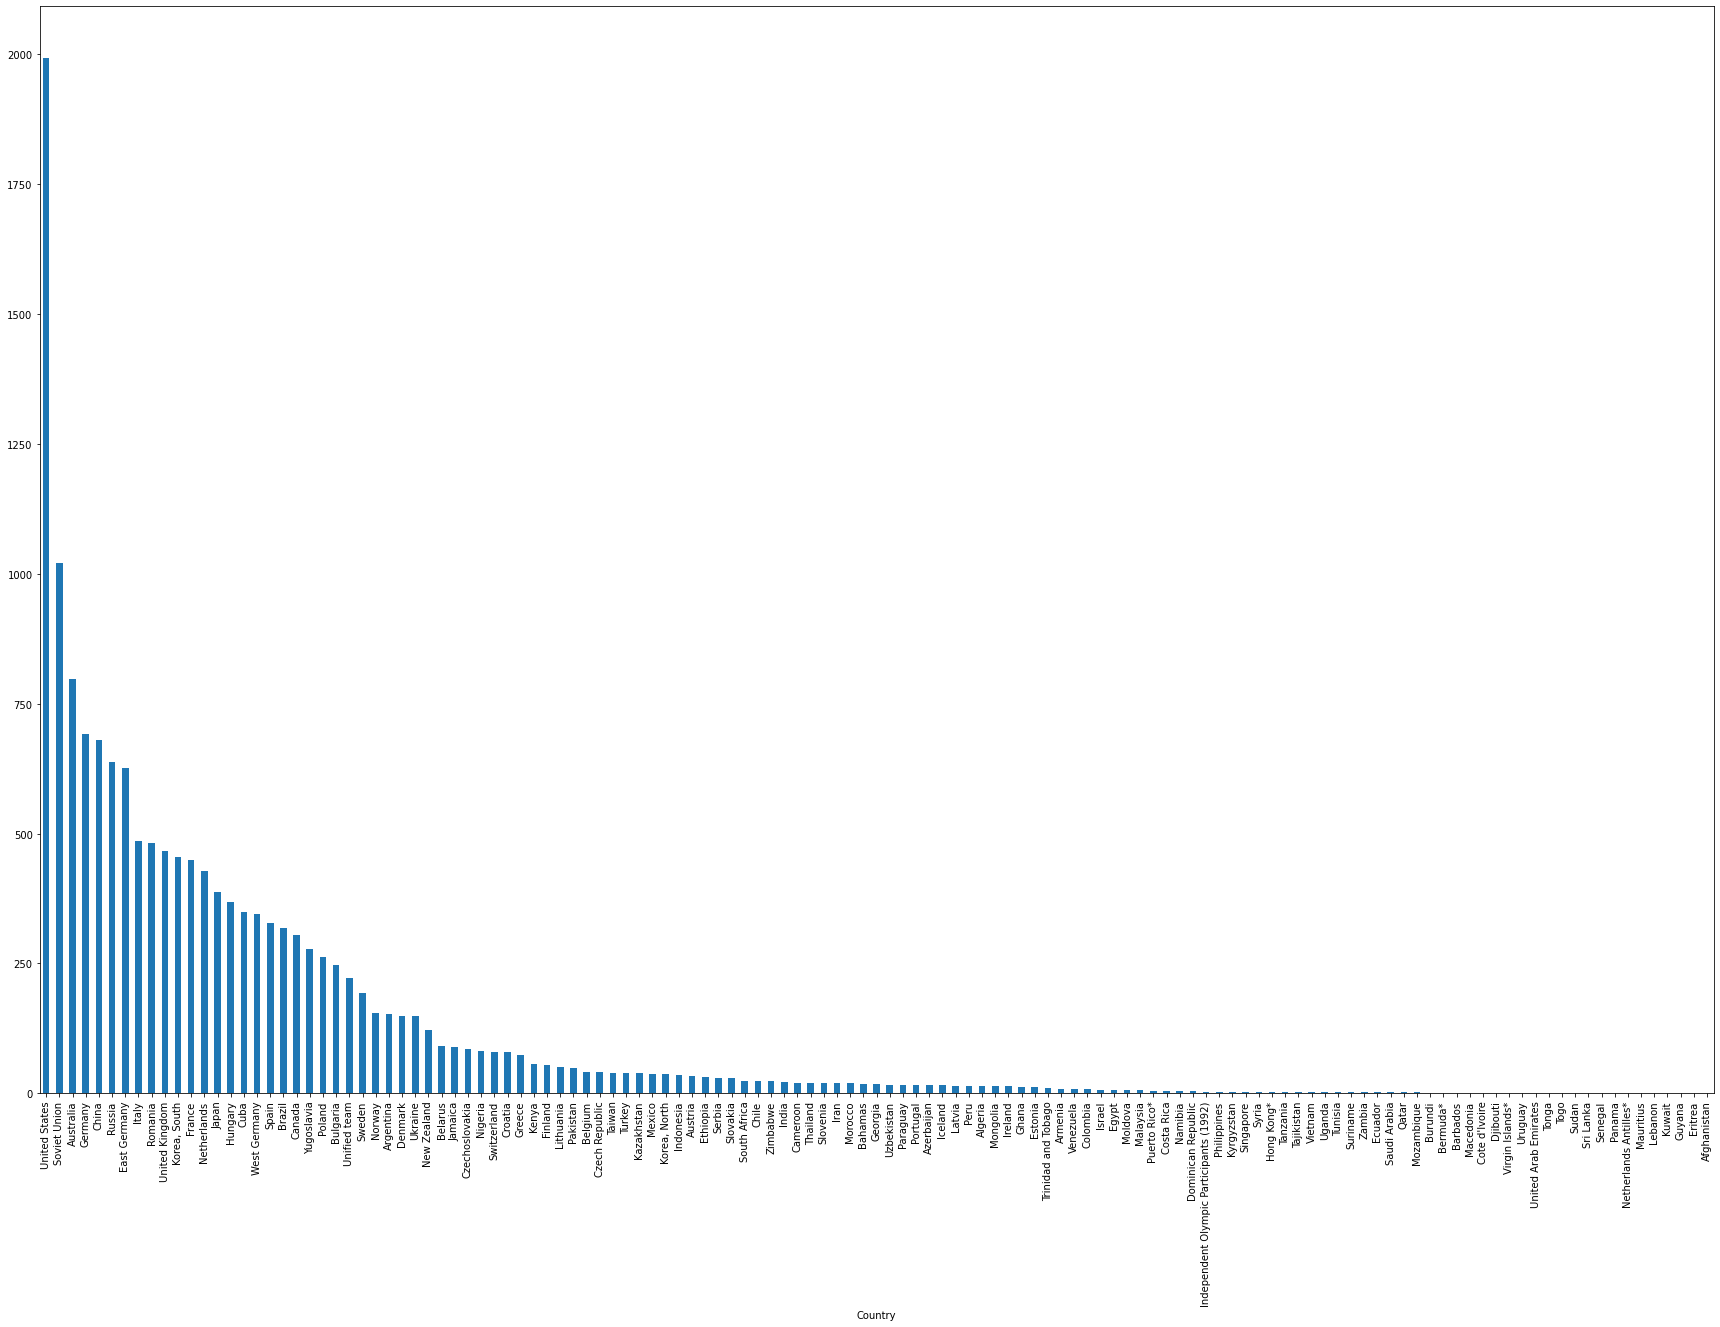

In [5]:
# group by country and count medals for each unique country
#all countries
plt.subplots(figsize=(30, 20))
df.groupby('Country')['Medal'].count().sort_values(ascending = False)
df.groupby('Country')['Medal'].count().sort_values(ascending = False).plot(kind = 'bar')

In [6]:
df.groupby(['Country', 'Gender'])['Medal'].count()

Country       Gender
Afghanistan   Men         1
Algeria       Men        11
              Women       3
Argentina     Men        99
              Women      54
                       ... 
West Germany  Women      79
Yugoslavia    Men       218
              Women      60
Zambia        Men         2
Zimbabwe      Women      23
Name: Medal, Length: 204, dtype: int64

## Highest number of medals? (top 20)

In [7]:
#who have the highest number of medals? (top 20)
#convert the groupby to a dataframe
top20 = pd.DataFrame(df.groupby('Country')['Medal'].count().sort_values(ascending = False)).reset_index()
#delete rows below row 20
#the first 20 rows
top20 = top20.iloc[:20]
top20

,Country,Medal
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679
5,Russia,638
6,East Germany,626
7,Italy,486
8,Romania,482
9,United Kingdom,467


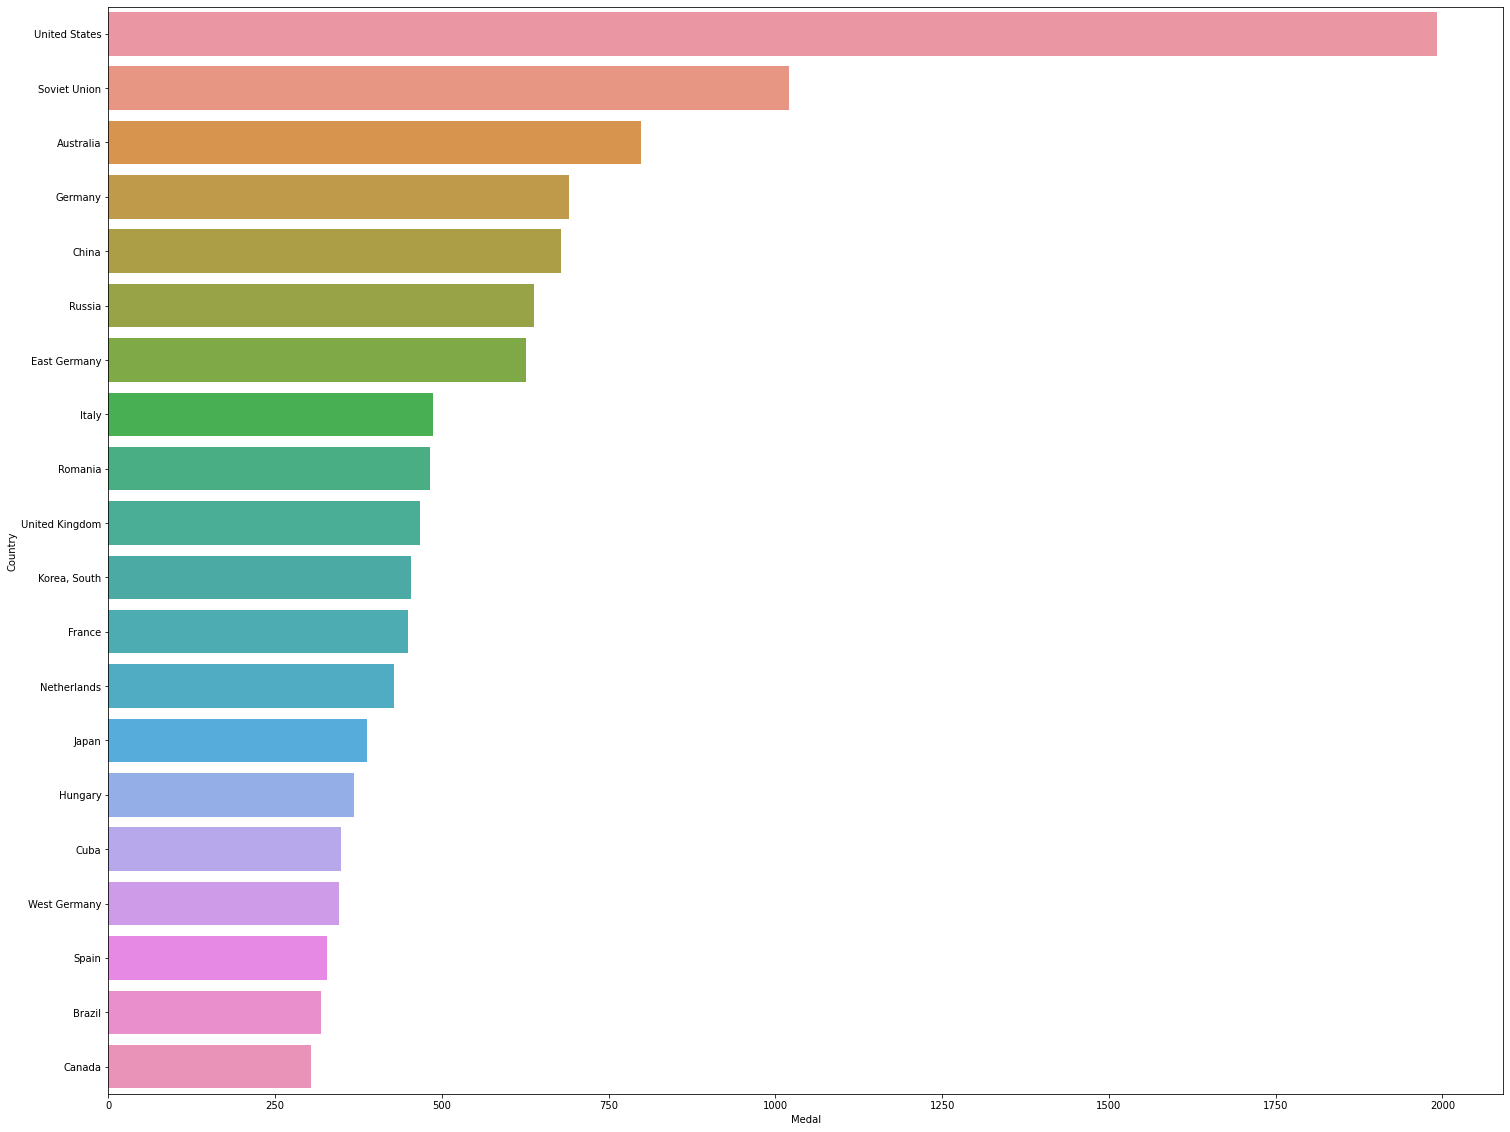

In [8]:
# figsize(width, height)
plt.subplots(figsize=(25, 20))
sns.barplot(x = top20.Medal, y = top20.Country)

### Based on the data, the country that has the highest number of medals between 1976 and 2008 is the United States with 1,992 medals. 🥇U.S.A! U.S.A!

## Question 2: Who is the athlete with the highest number of gold medals? (top 10)

In [9]:
df.groupby('Athlete')['Medal'].value_counts()

Athlete                Medal 
AAMODT, Ragnhild       Gold      1
AARDENBURG, Willemien  Bronze    1
AARDEWIJN, Pepijn      Silver    1
AARONES, Ann Kristin   Bronze    1
ABAJO, Jose Luis       Bronze    1
                                ..
ZYKINA, Olesya         Bronze    1
                       Silver    1
ZÜHLKE, Steffen        Bronze    1
ZÜLOW, Andreas         Gold      1
ÖRSTED, Hans-Henrik    Bronze    1
Name: Medal, Length: 13273, dtype: int64

In [10]:
#filter dataframe only gold medalists
gold = df[df.Medal == 'Gold']
gold.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold
11,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold
12,Montreal,1976.0,Aquatics,Swimming,4x100m freestyle relay,"BABASHOFF, Shirley Farber",Women,USA,United States,W,Gold


In [11]:
#use groupby on the new dataframe and obtain count of golds for each athlete
gold.groupby(['Athlete', 'Country'])['Medal'].count().sort_values(ascending = False)

Athlete                 Country      
PHELPS, Michael         United States    14
LEWIS, Carl             United States     9
BIONDI, Matthew         United States     8
THOMPSON, Jenny         United States     8
OTTO, Kristin           East Germany      6
                                         ..
NOTT, Tara              United States     1
NOTHSTEIN, Marty        United States     1
NORELIUS, Kristine Lee  United States     1
NORDBY, Bente           Norway            1
AAMODT, Ragnhild        Norway            1
Name: Medal, Length: 4061, dtype: int64

In [12]:
#change to a dataframe
gold_df = pd.DataFrame(gold.groupby(['Athlete','Country'])['Medal'].count().sort_values(ascending = False)).reset_index()

In [13]:
#obtain top 10
gold_df = gold_df.iloc[:10]
gold_df

,Athlete,Country,Medal
0,"PHELPS, Michael",United States,14
1,"LEWIS, Carl",United States,9
2,"BIONDI, Matthew",United States,8
3,"THOMPSON, Jenny",United States,8
4,"OTTO, Kristin",East Germany,6
5,"ANDRIANOV, Nikolay",Soviet Union,6
6,"SCHERBO, Vitaly",Unified team,6
7,"VAN DYKEN, Amy",United States,6
8,"KIM, Nelli",Soviet Union,5
9,"COMANECI, Nadia",Romania,5


/Users/liyatilahun/.virtualenvs/ds/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


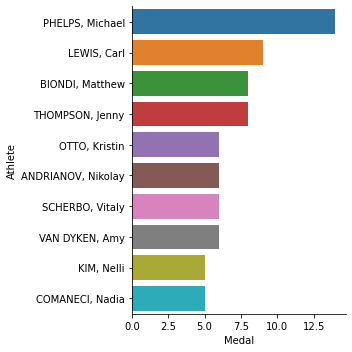

In [14]:
# figsize(width, height)
# plt.subplots(figsize=(20, 10))
# sns.barplot(x = gold_df.Medal, y = gold_df.Athlete)
# sns.set(style="whitegrid")
sns.factorplot(x = 'Medal', y = 'Athlete', data = gold_df, kind = 'bar')

### Based on the data, the athlete with the highest number of gold medals between 1976 and 2008 is Michael Phelps with 14 gold medals. 🥇🥇🥇

### U.S seems to be dominating the top 4 spots 

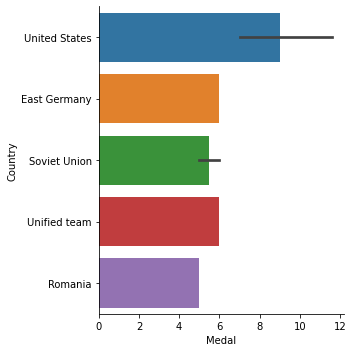

In [15]:
sns.factorplot(x = 'Medal', y = 'Country', data = gold_df, kind = 'bar')

## Question 3: In 2008, which country had the highest number of medals? (top 5)

In [17]:
#drop the Nan value in year
#FILTER YEARS WITH NO NAN VALUES
df = df[df['Year'].notna()]

#Convert year values from float to int
df.Year = df.Year.astype(int)

#new df with datas only yr 2008 
y2008 = df[df.Year == 2008]
y2008.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
13391,Beijing,2008,Aquatics,Diving,3m springboard,"QIN, Kai",Men,CHN,China,M,Bronze
13392,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"LIN, Yue",Men,CHN,China,M,Gold
13393,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"WU, Melissa",Women,AUS,Australia,W,Silver
13394,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"DOBROSKOK, Dmitriy",Men,RUS,Russia,M,Bronze
13395,Beijing,2008,Aquatics,Diving,synchronized diving 3m springboard,"GUO, Jingjing",Women,CHN,China,W,Gold


In [18]:
#use groupby on the new dataframe and obtain count of medals for each country
y08 = pd.DataFrame(y2008.groupby(['Country'])['Medal'].count().sort_values(ascending = False)).reset_index()

#top 5 
y08 = y08.iloc[:5]
y08

,Country,Medal
0,United States,315
1,China,184
2,Australia,149
3,Russia,143
4,Germany,101


## Using Pie chart 🍰

([<matplotlib.patches.Wedge at 0x126ca5310>,
 [Text(0.48970009669378833, 0.9849841700748773, 'United States'),
  Text(-1.0587533223847845, 0.298398060213502, 'China'),
  Text(-0.6854059844761102, -0.8603595971710517, 'Australia'),
  Text(0.383090350062769, -1.031136161565865, 'Russia'),
  Text(1.0311361884664922, -0.38309027765631803, 'Germany')])

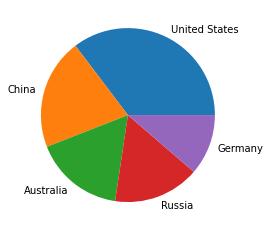

In [19]:
#pie chart
plt.pie(y08['Medal'].values, labels = y08['Country'])

## Using Bar chart 📊

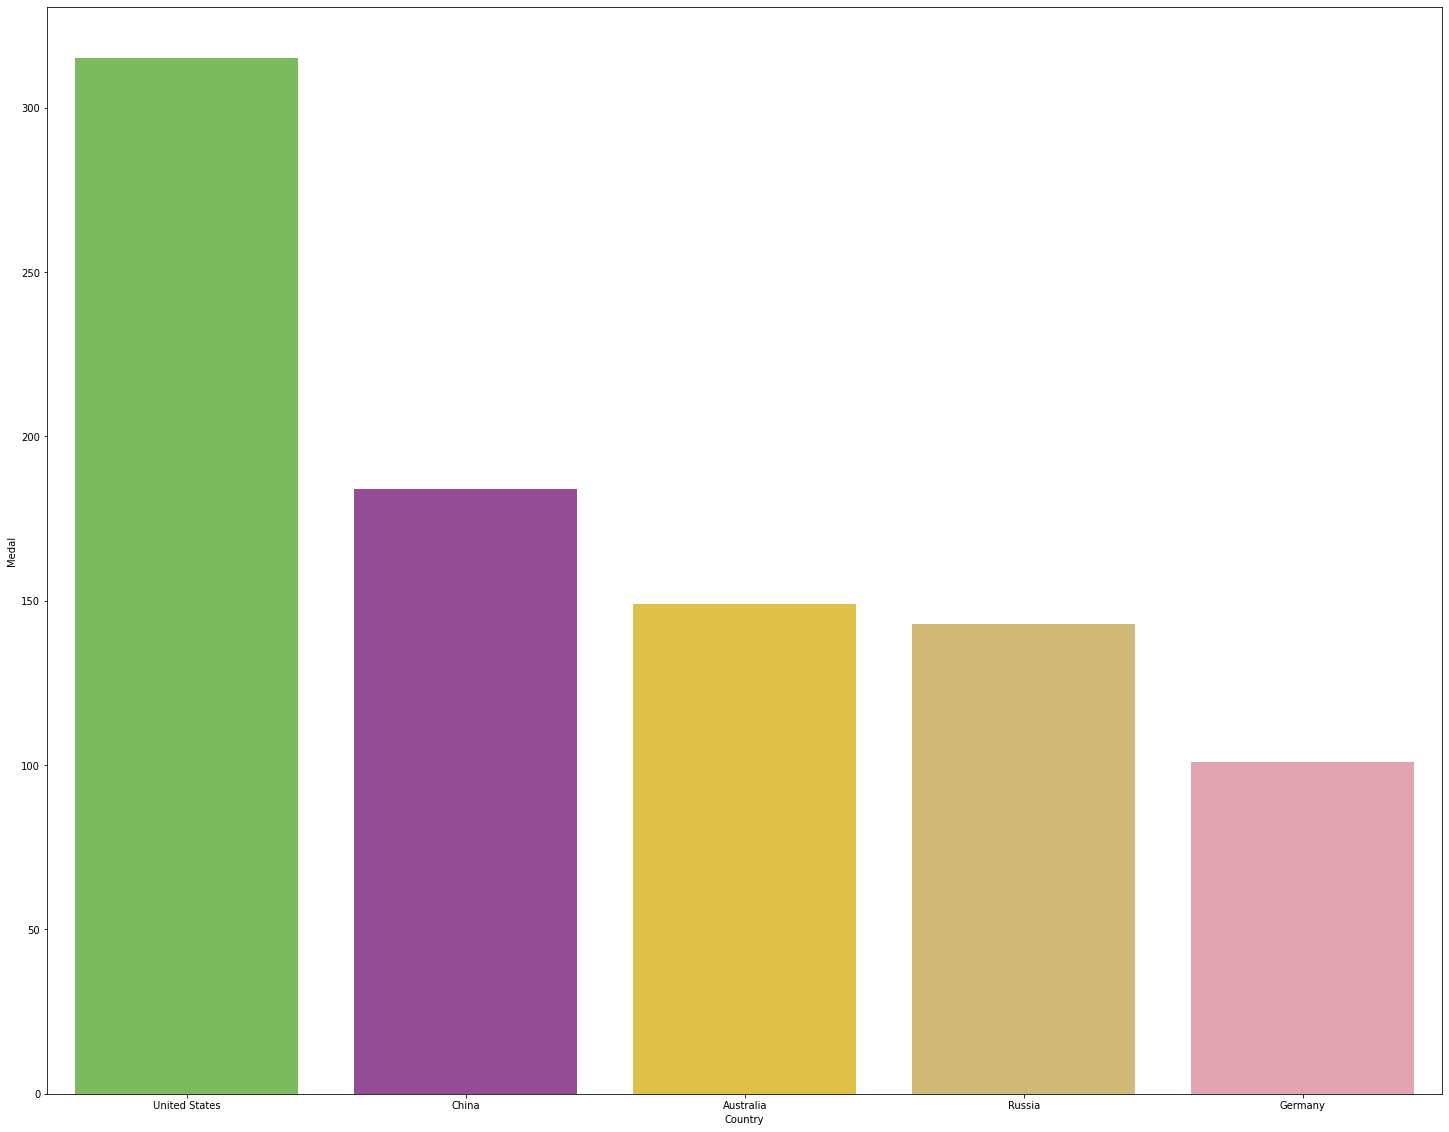

In [20]:
# figsize(width, height)
plt.subplots(figsize=(25, 20))
# Tuning our color palette for the data
palette = ['#78C850',  # Grass
#                     '#F08030',  # Fire
#                     '#6890F0',  # Water
#                     '#A8B820',  # Bug
#                     '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.barplot(y = y08.Medal, x = y08.Country, palette = palette)

In [21]:
df_plot = y2008.groupby(['Country', 'Medal']).size().sort_values(ascending=False).reset_index().pivot(columns='Medal', index='Country', values=0)
#fill NA values with 0
df_plot = df_plot.fillna(0)
#convert to dataframe
plot = pd.DataFrame(df_plot).reset_index()
#add a column that holds sum of G+S+B for each country
plot['total'] = plot.sum(axis=1)

#sort df by total medal
plot = plot.sort_values(by='total', ascending=False)

# plot = plot.reset_index().set_index('Country')
# plot.drop('Medal', axis=1)
print(plot.columns)
plot.head()


Index(['Country', 'Bronze', 'Gold', 'Silver', 'total'], dtype='object', name='Medal')


Medal,Country,Bronze,Gold,Silver,total
81,United States,81.0,125.0,109.0,315.0
15,China,57.0,74.0,53.0,184.0
4,Australia,76.0,31.0,42.0,149.0
62,Russia,56.0,43.0,44.0,143.0
29,Germany,43.0,42.0,16.0,101.0


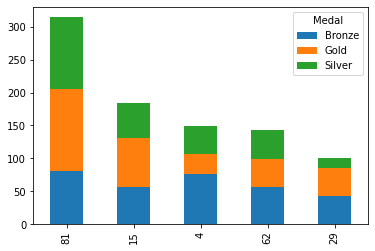

In [22]:
#first five rows (top 5)
top5 = plot.head()
#remove column 'total' since we don't want it in the visualization
top5 = top5.drop('total', axis=1)

top5.plot(kind='bar', stacked=True)

#change name of x-axis########################################


### Based on the data, U.S.A 🇺🇸 has the highest number of medals in 2008, second is China 🇨🇳

## Question 4: In 2008, which country had the highest number of women who won medals? (top 10)

In [23]:
#a dataframe filtered gender women and year 2008
w2008 = df[(df['Gender'] == 'Women') & (df['Year'] == 2008)]
w2008.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
13393,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"WU, Melissa",Women,AUS,Australia,W,Silver
13395,Beijing,2008,Aquatics,Diving,synchronized diving 3m springboard,"GUO, Jingjing",Women,CHN,China,W,Gold
13397,Beijing,2008,Aquatics,Diving,synchronized diving 3m springboard,"POZDNYAKOVA, Anastasia",Women,RUS,Russia,W,Silver
13400,Beijing,2008,Aquatics,Diving,synchronized diving 3m springboard,"KOTZIAN, Ditte",Women,GER,Germany,W,Bronze
13401,Beijing,2008,Aquatics,Diving,synchronized diving 10m platform,"WANG, Xin",Women,CHN,China,W,Gold


In [24]:
#count num of women in each country
women = pd.DataFrame(w2008['Country'].value_counts()).reset_index()
#change column name
women.columns = ['Country', 'Count']
#top 10
women = women.iloc[:10]
women

,Country,Count
0,United States,162
1,China,128
2,Australia,85
3,Russia,80
4,Netherlands,58
5,Germany,46
6,Brazil,35
7,"Korea, South",31
8,United Kingdom,29
9,Japan,27


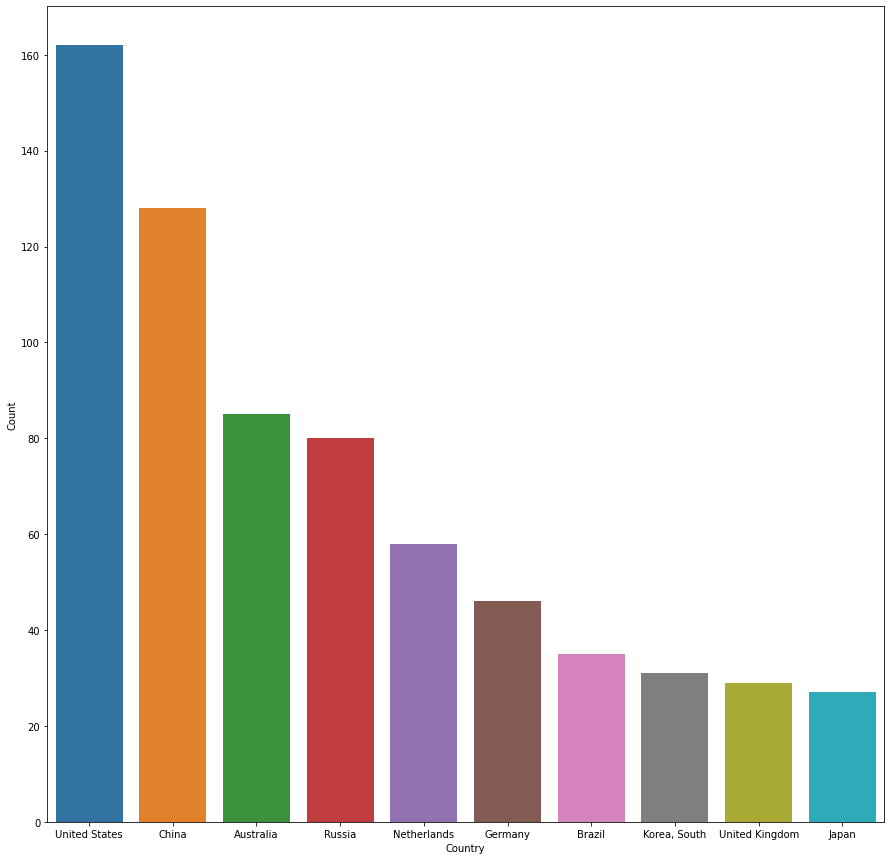

In [25]:
# figsize(width, height)
plt.subplots(figsize=(15, 15))
sns.barplot(x = women.Country, y = women.Count)


### Based on the data, the country that has the highest number of women winning medals in 2008 is the United States with 162 medals. 🥇🥈🥉
### U.S seems to be leading..... again 🇺🇸

## Question 5: Is there a difference between the number of Male vs Women represented by year?

<function matplotlib.pyplot.show(*args, **kw)>

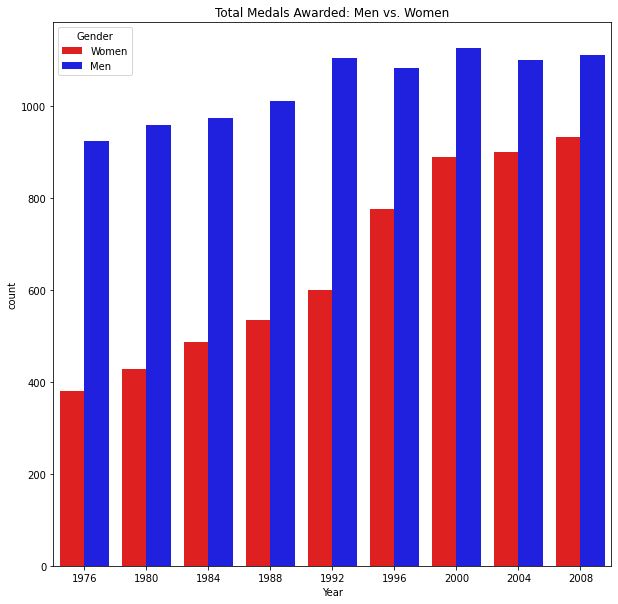

In [26]:
plt.subplots(figsize=(10, 10))
sns.countplot(data=df,x='Year',hue='Gender',palette=('red','blue'))
plt.title('Total Medals Awarded: Men vs. Women')
plt.show

### Based on the above bar chart, there is a difference, especially in earlier olympic years. But the number of women participants is increasing every year 👩🏽‍

## Question 6: Did Ethiopia's medal count increase from 1976-2008? 🇪🇹

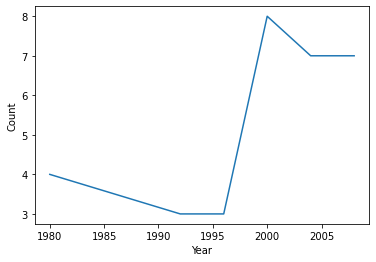

In [27]:
eth = df[df.Country == 'Ethiopia']
#count num of medal in each year
eth_year = pd.DataFrame(eth['Year'].value_counts()).reset_index()
#change column name
eth_year.columns = ['Year', 'Count']
eth_year
sns.lineplot(data=eth_year,x='Year',y='Count')

<function matplotlib.pyplot.show(*args, **kw)>

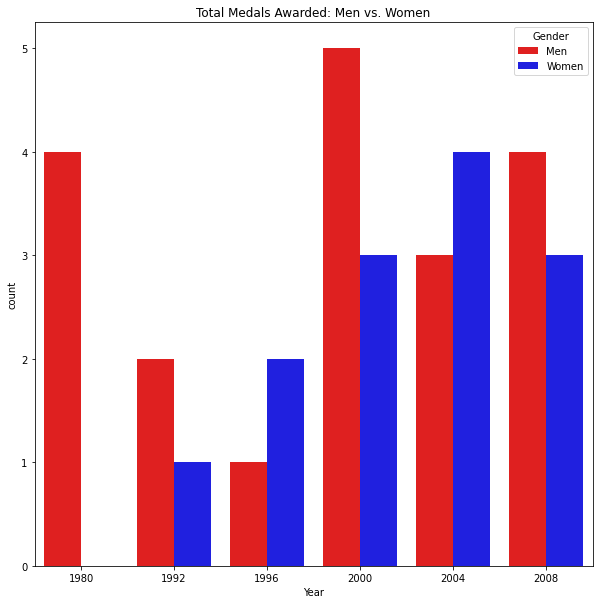

In [28]:
plt.subplots(figsize=(10, 10))
sns.countplot(data=eth,x='Year',hue='Gender',palette=('red','blue'))
plt.title('Total Medals Awarded: Men vs. Women')
plt.show

### According to wikipedia, except for the 1976, 1984 and 1988 Games, Ethiopia has participated in the Olympics
### After 1980, medal count lowered, but after 1996, it increased again. 

## Question 7: Is there a correlation between medal count and year? (For Ethiopia)🇪🇹

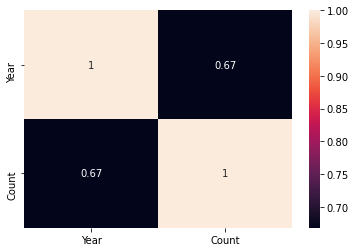

In [29]:
eth_year
sns.heatmap(eth_year.corr(), annot=True)

### There isn't much correlation between medal count and year for Ethiopia. A correlation of 0.67 is not strong enough.

## Question 8: Distribution based on gender for Ethiopia

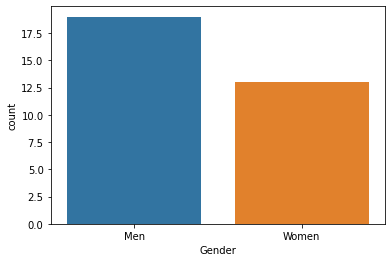

In [30]:
sns.countplot(data=eth,x="Gender")

### There have been more male participants from 1976 - 2008.

## Distribution based on discipline for Ethiopia

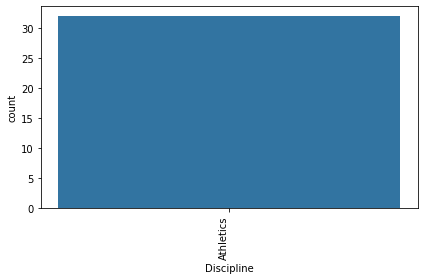

In [31]:
ax=sns.countplot(data=eth,x="Discipline")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

### Ethiopia has participated only in Athletics from 1976 - 2008

## What about U.S?

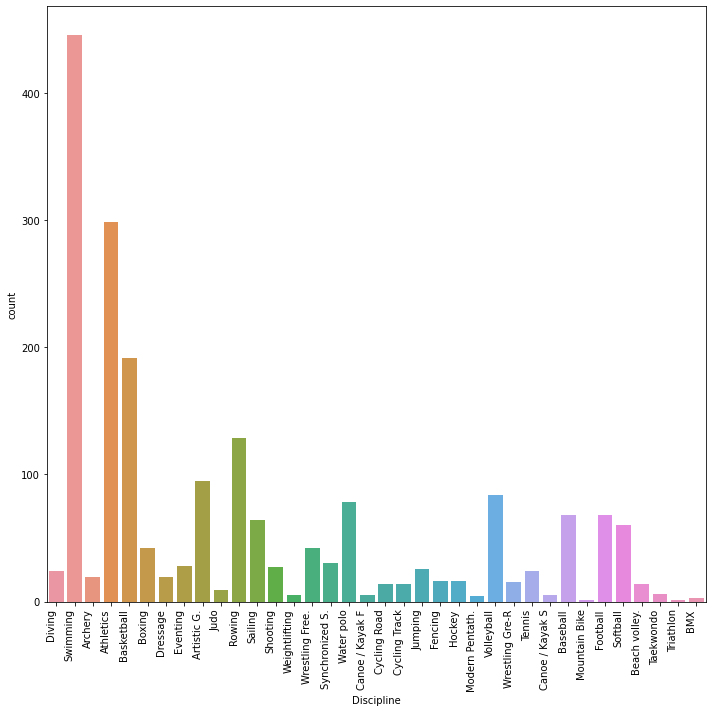

In [32]:
plt.subplots(figsize=(10, 10))
usa = df[df.Country == 'United States']
ax=sns.countplot(data=usa,x="Discipline")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

## Wow! Just, Wow! U.S has participated in 36 disciplines!

## Question 9: Is there a correlation between medal count and year? (all countries included)

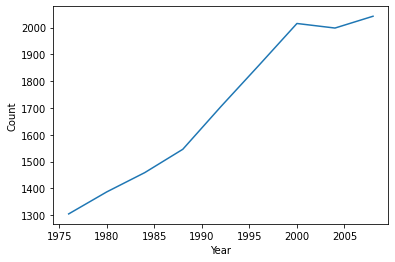

In [33]:
#count num of medal in each year
all_year = pd.DataFrame(df['Year'].value_counts()).reset_index()
#change column name
all_year.columns = ['Year', 'Count']
all_year

sns.lineplot(data=all_year,x='Year',y='Count')

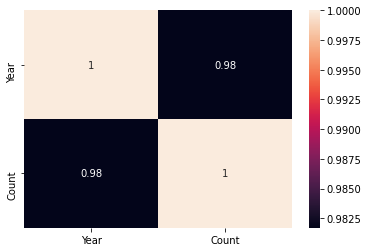

In [34]:
sns.heatmap(all_year.corr(), annot=True)

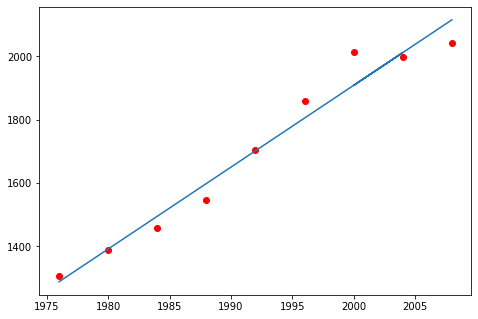

In [38]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
#slope and intercept for straight line
m, b = np.polyfit(all_year.Year, all_year.Count, 1)
plt.plot(all_year.Year, m*all_year.Year + b)

ax.scatter(all_year.Year, all_year.Count, color='r')

### It looks like there is a correlation between year and medal count. The values are close to the best fit line, which means their relationship is linear like. As the year goes by, I am guessing more games were added and more participants were added. 
## But we can't really conclude because correlation doesn't imply causation!

   # Summary of Analysis Result
 ### Through out the data, U.S seems to be leading in highest number of medals through out the years. The highest number of gold medals per individual goes to U.S swimmer  PHELPS, Michael. The top 4 highest were all from the U.S. In looking at their participation based on discipline, it looks like U.S participated in around 36 different types of games. 
 ### Next leading countries included Soviet Union, Australia, Germany and China. The olympics started in 1896, and Soviet Union existed from 1922 to 1991. And earned many medals in that period. 
 ### Another interesting finding was that women were underrepresented in these games. There was a big gap around 1976 but it increased each year. But there is still a gap of representation between genders. 
 ### It looks like there is a correlation between year and medal count. As the year goes by, I am guessing more games were added and more participants were added. 
 ### And countries who are doing well in their economy have a higher amount of medals.
 ##  But we can't really conclude because correlation doesn't imply causation!

## t-test comparison between different groups

In [77]:
#medal comparison between year 2004 and 2008
def f(row):
    if row['Medal'] == 'Gold':
        val = 1
    elif row['Medal'] == 'Silver':
        val = 2
    else:
        val = 3
    return val

#new column based on medal type
df['medal_num'] = df.apply(f, axis=1)

df.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,medal_num
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,3
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,1
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,3


## Were more games added through out the olympics? 